# Estimation

Estimation means make any inference of a situation. Here we will learn about several estimation techniques by which we can estimate a situation better.\

## Types of Estimates

We generally can make two types of estimates about a population:\

* **Point estimate:** a single number that is used to estimate an unknown population parameter.

* **Interval estimate:** a range of values used to estimate population parameters.

## Estimator and Estimate

**Estimator:** An estimator is a sample statistic used to estimate a population parameter.\
**Estimate:** An estimate is a specific observed value of a statistic

Below a table with example of estimates and estimators is given to make it more clear:

![estimator image](estimate.jpg "Example")

## Criteria of a Good Estimator

Some statistics are better estimators than others. We can evaluate the quality of an estimator by using four criteria:

1. **Unbiasedness:** The term *unbiasedness* refers to the fact that sample mean is an unbiased estimator of a population mean because the mean of the sampling distribution of sample means taken from the same population is equal to the population mean itself. 

2. **Efficiency:** *Efficiency* refers to the size of the standard error of the statistic. If we compare two statistic from a sample of the same size and try to decide which one is the more efficient estimator, we would pic the statistic that **has the samller standard error, or standard deviation of the sampling distribution.**

3. **Consistency:** A statistic is a *consistent estimator* of a population parameter if as the sample size increases, it becomes almost certain that the value of the statistic comes very close to the value of the population parameter.

4. **Sufficiency:** An estimator is sufficient if it makes so much use of information in the sample that no other estimator could extract from the sample additional information about the population parameter being estimated.


## Point Estimate

Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. The average of a sample is known as the sample mean.
The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [18]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372

In [20]:
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,
                               size=500)            # Sample 1000 values

print ( sample_ages.mean() )                         # Show sample mean

population_ages.mean() - sample_ages.mean()   # Check difference between means

42.388


0.614372000000003

Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.\
Another point estimate that may be of interest is the proportion of the population that belongs to some category or subgroup. For example, we might like to know the race of each voter we poll, to get a sense of the overall demographics of the voter base. You can make a point estimate of this sort of proportion by taking a sample and then checking the ratio in the sample:

In [21]:
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
    
demo_sample = random.sample(population_races, 1000)   # Sample 1000 values

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000 )

hispanic proportion estimate:
0.192
asian proportion estimate:
0.099
white proportion estimate:
0.379
other proportion estimate:
0.099
black proportion estimate:
0.231


## Sampling Distributions and The Central Limit Theorem

Many statistical procedures assume that data follows a normal distribution, because the normal distribution has nice properties like symmetricity and having the majority of the data clustered within a few standard deviations of the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed. Let's investigate by plotting the data and sample we created earlier and by checking the skew:

-0.12008483603917186


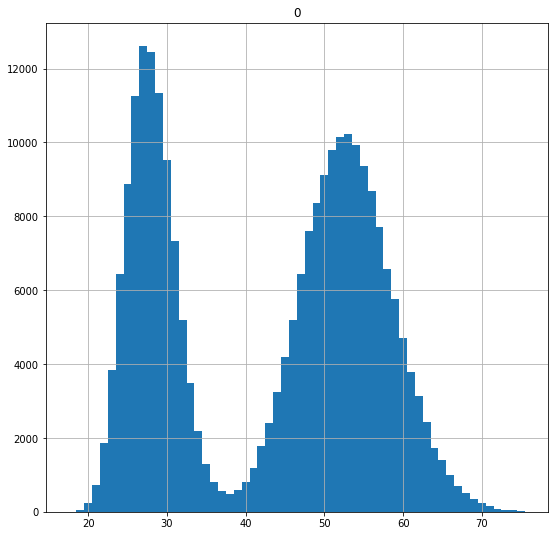

In [23]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(population_ages))

The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. The sample we drew from this population should have roughly the same shape and skew:

-0.056225282585406065


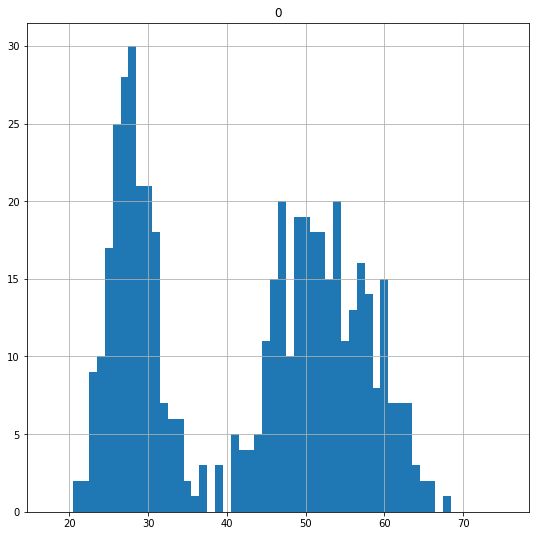

In [24]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(sample_ages) )

The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that assume a normal distribution to this data set, since it is not normal. In reality, we can, thanks the central limit theorem.\
The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.
To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

<AxesSubplot:ylabel='Density'>

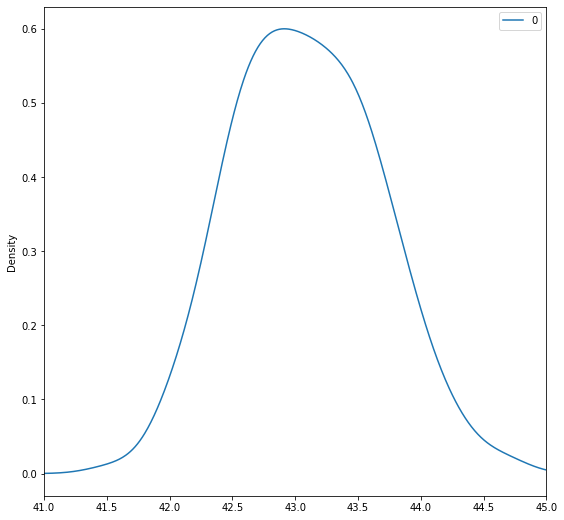

In [25]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(41,45))   

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. In addition, the mean of the sampling distribution approaches the true population mean:

In [26]:
population_ages.mean() - np.array(point_estimates).mean()

-0.08440799999999626

## Exercise

The Greensboro Coliseum is considering expanding its seating capacity and needs to know both the average number of people who attend events there and the variability in this number. The following are the attendances (in thousands) at nine randomly selecting sporting events. Find point estimates of the mean and the variance of the population from which the sample was drawn.\

8.8, 14.0, 21.3, 7.9, 12.5, 20.6, 16.3, 14.1, 13.0  

## Interval Estimates

An interval estimate describes a range of values within which a population parameter is likely to lie. Simply we need to calculate the standard error of the mean and we can move towards accordingly.\

**In statistics, the probability that we associate with an interval estimate is called the confidence level.** This probability indicates how confident we are that the interval estimate will include the population parameter.\

**The confidence Interval is actually the range of the estimates we are making.** 

If you know the standard deviation of the population, the margin of error is equal to:

$${z}*\frac{\sigma}{\sqrt{n}}$$

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value. The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with stats.norm.ppf().).\

Let's calculate a 95% confidence for our mean point estimate:

In [36]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(41.70306406882683, 43.34293593117317)


In [28]:
#let's create several confidence interval to see in more details 
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

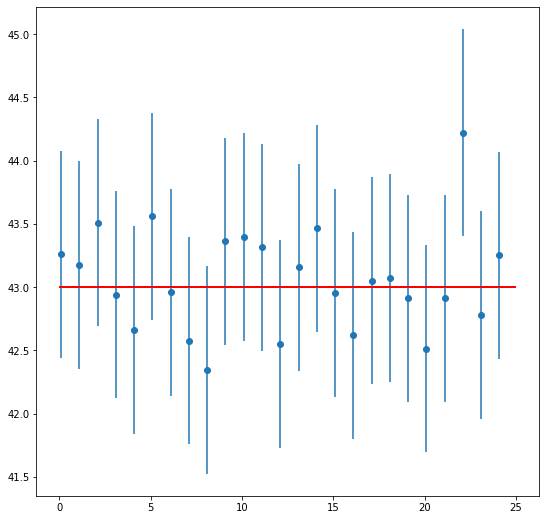

In [29]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")

Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

## Interval estimates using T distribution

### or we can tell this confidence interval estimation using T distribution

So, for that we need to know what is T distribution first.

### T Distribution



The *t*-distribution, also known as Student's t-distribution, is a way of describing data that follow a bell curve when plotted on a graph, with the greatest number of obervations close to the mean and fewer observations in the tails. \
It is a type of **normal distribution** used for smaller sample sizes, where the **variance** in the data is unknown. The variance in a t-distribution is estimated based on the `degrees of freedom` of the dataset. 

**t-scores: A t-score is the number of `standard deviations` from the mean in a t-distribution. In statistics, t-scores are primarily used to find two things:

1. The upper and lower bounds of a confidence interval when tthe data are approximately normally distributed.
2. The p-value of the test statistc for t-tests and regression tests.

**t-scores and confidence intervals:** Confidence intervals use t-scores to calculate the upper and lower bounds of the prediction interval. The t-score used to generate the upper and lower bounds is also known as the critical value of t, or t*.

Now when the sample size is less (>30) and the population standard deviation is unknown at that stage we generally go for t-test. Furthermore we assume that the population is normal or approximately normal.

now we are telling about `Degrees of Freedom` so what is it?

### Degrees of freedom

We are degrees of freedom? We can define them as the number of values we can choose freely.\

Assume that we are dealing with two sample values, a and b, and we know that they have a mean of 18. Symbolically, the situation is:

$$\frac{a+b}{2} = {18}$$

How can we find what values a and b can take on this situation? The answer is that a and b can be any two values whose sum is 36, because `36/2 = 18`\
Suppose we learn that a has value of 10. Now `b` is no longer free to take on any value but must have the value of `26`, because

$$ if a = 10 $$

$$then \frac{10+b}{2} = 18$$

$$ so 10 + b = 36 $$

$$ therefore b = 26 $$

This example shows that when there are two elements in a sample and we know the sample mean of these two elements, we are free to specify only one of the elements because the other element will be determined by the fact that the two elements sum to twice the sample mean. Statisticians say, "We have one degree of freedom."\

Look at another example, there are seven elements in our sample, and we learn that the mean of these elements is 16. Symbolically, we have this situation:


$$\frac{a+b+c+d+e+f+g}{7} = 16$$

In this case, the degrees of freedom, or the number of variables we can specify freely, are 7-1=6, we are free to give values to six variables, and then we are no longer free to specify the seventh variable. It is determined automatically.\

With two sample values, we had one degree of freedom (2-1=1), and with seven sample values, we had six degrees of freedom (7-1=6). In each of these two examples, then, we had $n-1$ degrees of freedom, assuming n is the sample size.

### Working Example of T-test

In [2]:
# t-test for independent samples
import numpy as np
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

In [7]:
# t-test for independent samples
import numpy as np
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# function for calculating the t-test for two independent samples

def independent_ttest(data_1, data_2, alpha):
    #calculate means
    mean_1, mean_2 = mean(data_1), mean(data_2)
    #calculate standard errors
    error_1, error_2 = sem(data_1), sem(data_2)
    #standard error on the difference between the samples
    error_diff = sqrt(error_1**2 + error_2**2)
    #calculate the t statistic
    t_stat = (mean_1 - mean_2)/error_diff
    #degrees of freedom
    df = len(data_1) + len(data_2) - 2
    #calculate the critical value
    cv = t.ppf(1 - alpha, df)
    #calculate the p-value
    p = (1 - t.cdf(abs(t_stat), df)) * 2
    #return everything
    return t_stat, df, cv, p


In [8]:
# seed the random number generator
seed(1)
# generate two independent samples
data_1 = 5 * randn(100) + 50
data_2 = 5 * randn(100) + 51
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data_1, data_2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-2.262, df=198, cv=1.653, p=0.025
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.
